# Magritte bench
---

In [1]:
import os
import sys

curdir = os.getcwd()
datdir = f'{curdir}/data/'

import numpy             as np
import matplotlib.pyplot as plt
import magritte.tools    as tools
import magritte.setup    as setup
import magritte.core     as magritte
import ipywidgets        as widgets

dimension = 1
npoints   = 500
nrays     = 2
nspecs    = 5
nlspecs   = 1
nquads    = 50

r_in   = 1.0E13   # [m]
r_out  = 7.8E16   # [m]
nH2_in = 2.0E13   # [m^-3]
temp   = 2.0E+01  # [K]
turb   = 1.5E+02  # [m/s]

rs = np.linspace (np.log10(r_in), np.log10(r_out), npoints, endpoint=True)

modelName = f'density_distribution_VZ_1D'
modelFile = f'{modelName}.hdf5'
lamdaFile = f'{datdir}test.txt'

X_mol = 1.0e-8

def nH2 (r):
    return nH2_in * np.power(r_in/r, 2.0)

def nTT (r):
    return X_mol  * nH2(r)

model = magritte.Model ()
model.parameters.set_spherical_symmetry(False)
model.parameters.set_model_name        (modelFile)
model.parameters.set_dimension         (dimension)
model.parameters.set_npoints           (npoints)
model.parameters.set_nrays             (nrays)
model.parameters.set_nspecs            (nspecs)
model.parameters.set_nlspecs           (nlspecs)
model.parameters.set_nquads            (nquads)

model.geometry.points.position.set([[r, 0, 0] for r in rs])
model.geometry.points.velocity.set([[0, 0, 0] for i in range(npoints)])

model.chemistry.species.abundance = [[     0.0, nTT(r), nH2(r),  0.0,      1.0] for r in rs]
model.chemistry.species.symbol    =  ['dummy0', 'test',   'H2', 'e-', 'dummy1']

model.thermodynamics.temperature.gas  .set( temp                 * np.ones(npoints))
model.thermodynamics.turbulence.vturb2.set((turb/magritte.CC)**2 * np.ones(npoints))

direction = np.array([[0,+1,0], [0,-1,0]])            # Comment out to use all directions
model.geometry.rays.direction.set(direction)          # Comment out to use all directions
model.geometry.rays.weight   .set(0.5 * np.ones(2))   # Comment out to use all directions

model = setup.set_Delaunay_neighbor_lists (model)
model = setup.set_Delaunay_boundary       (model)
model = setup.set_boundary_condition_CMB  (model)
model = setup.set_linedata_from_LAMDA_file(model, lamdaFile)
model = setup.set_quadrature              (model)

model.write()

Writing parameters...
Writing points...
Writing rays...
Writing boundary...
Writing chemistry...
Writing species...
Writing thermodynamics...
Writing temperature...
Writing turbulence...
Writing lines...
Writing lineProducingSpecies...
Writing linedata...
ncolpoar = 1
--- colpoar = 0
Writing collisionPartner...
(l, c) = 0, 0
Writing quadrature...
Writing populations...
Writing radiation...
Writing frequencies...


In [2]:
model = magritte.Model(modelFile)

fcen = model.lines.lineProducingSpecies[0].linedata.frequency[0]
dd = 3.0e+3 / magritte.CC
fmin = fcen - fcen*dd
fmax = fcen + fcen*dd

model.compute_spectral_discretisation (fmin, fmax)
model.compute_inverse_line_widths     ()
model.compute_LTE_level_populations   ()

ray_nr = 0

model.compute_image(ray_nr)

nu = np.array(model.radiation.frequencies.nu)[0]
rs = np.array(model.images[-1].ImX, copy=True)
im = np.array(model.images[-1].I,   copy=True)

                                           
-------------------------------------------
  Reading Model...                         
-------------------------------------------
 model file = density_distribution_VZ_1D.hdf5
-------------------------------------------
Reading parameters...
Reading points...
Reading rays...
Reading boundary...
Reading chemistry...
Reading species...
Reading thermodynamics...
Reading temperature...
Reading turbulence...
Reading lines...
Reading lineProducingSpecies...
Reading linedata...
read num 1
read sym test
nlev = 2
nrad = 1
Reading collisionPartner...
Reading quadrature...
Reading radiation...
Reading frequencies...
Not using scattering!
                                           
-------------------------------------------
  Model read, parameters:                  
-------------------------------------------
  npoints    = 500
  nrays      = 2
  nboundary  = 2
  nfreqs     = 50
  nspecs     = 5
  nlspecs    = 1
  nlines     = 1
  nquads     = 50
---

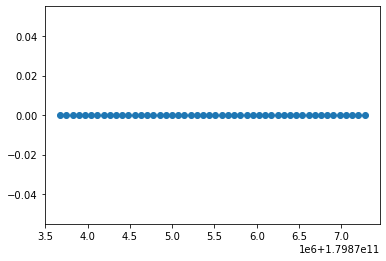

In [19]:
# plt.scatter(nu,im[0])
plt.scatter(nu,im[-2])

In [11]:
im.shape

(500, 50)

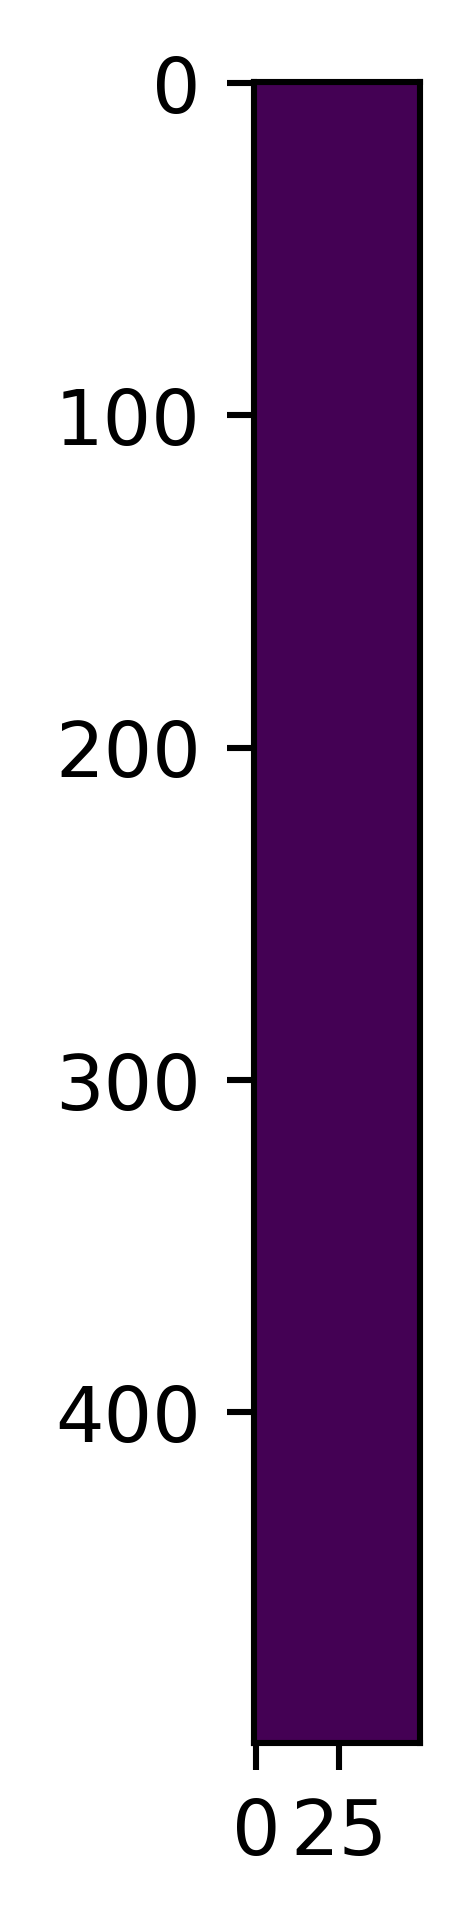

In [13]:
plt.figure(dpi=550)
plt.imshow(im)